In [3]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

class NetDropout(nn.Module):
    def __init__(self, n = 32):
        super().__init__()
        self.n = n
        
        self.conv1 = nn.Conv2d(1, self.n, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.3)
        self.conv2 = nn.Conv2d(self.n, (self.n//2), kernel_size=3, padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.3)
        self.conv3 = nn.Conv2d((self.n//2), (self.n//2), kernel_size=3, padding=1)
        self.conv3_dropout = nn.Dropout2d(p=0.3)

        self.fc1 = nn.Linear((self.n//2)*3*3, 32)
        self.fc2 = nn.Linear(32, 25)
        
        self.lsftmx = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv3(out)), 2)
        out = self.conv3_dropout(out)

        out = out.view(-1, (self.n//2)*3*3)
        out = torch.tanh(self.fc1(out))
        out = self.lsftmx(self.fc2(out))
        return out

In [24]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
loaded_model = NetDropout().to(device=device)
loaded_model.load_state_dict(torch.load("./model.t"))

<All keys matched successfully>

'F'

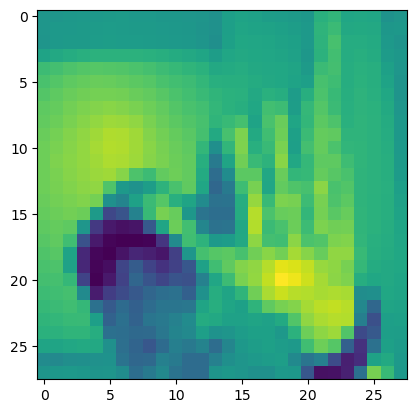

In [60]:
import cv2 
from torchvision import transforms
import torch.nn.functional as F

# Setup capture
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) 
ret, frame = cap.read()
image_np = np.array(frame)
# print(image_np)

# torch.from_numpy(image_np).shape
# img = torch.from_numpy(image_np).permute(2,1,0)
img =  transforms.functional.rgb_to_grayscale(torch.from_numpy(image_np).permute(2,1,0), num_output_channels=1)/255.0
# img2 =  F.interpolate(transforms.functional.rgb_to_grayscale(torch.from_numpy(image_np).permute(2,1,0), num_output_channels=1)/255.0, size=[1, 28, 28])
img2 = transforms.Resize((28,28))(img)
from matplotlib import pyplot as plt
plt.imshow(img2.permute(2,1,0))
img.shape, img2.shape

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
outs = loaded_model(img2.to(device=device))
max_vals, max_indexes = outs.max(dim=1)
letters[max_indexes[0]]


# width, height

In [62]:
cap.release()

In [61]:
while True: 
    ret, frame = cap.read()
    image_np = np.array(frame)
    img =  transforms.functional.rgb_to_grayscale(torch.from_numpy(image_np).permute(2,1,0), num_output_channels=1)/255.0
    img2 = transforms.Resize((28,28))(img)
    outs = loaded_model(img2.to(device=device))
    max_vals, max_indexes = outs.max(dim=1)
    print(letters[max_indexes[0]])

    # input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    # detections = detect_fn(input_tensor)
    
    # num_detections = int(detections.pop('num_detections'))
    # detections = {key: value[0, :num_detections].numpy()
    #               for key, value in detections.items()}
    # detections['num_detections'] = num_detections

    # # detection_classes should be ints.
    # detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    # label_id_offset = 1
    # image_np_with_detections = image_np.copy()

    # viz_utils.visualize_boxes_and_labels_on_image_array(
    #             image_np_with_detections,
    #             detections['detection_boxes'],
    #             detections['detection_classes']+label_id_offset,
    #             detections['detection_scores'],
    #             category_index,
    #             use_normalized_coordinates=True,
    #             max_boxes_to_draw=5,
    #             min_score_thresh=.5,
    #             agnostic_mode=False)

    # cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cap.release()
        break

c:\IT\anaconda3\Lib\site-packages\torch\nn\functional.py:1381: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "


K
G
H
G
H
H
H
H
H
X
H
H
H
K
H
H
H
G
Q
H
Q
Q
H
Q
Q
Q
H
H
H
Q
S
H
Q
H
L
H
L
K
R
G
T
K
Y
H
H
Y
H
S
Y
Y
Y
X
Y
Y
H
S
S
S
H
S
Y
Y
P
Y
L
H
L
H
H
Y
G
P
P
F
P
P
Y
F
G
F
F
F
Y
G
P
H
S
G
H
F
P
P
P
P
P
H
P
P
X
P
P
P
P
X
A
G
H
H
I
S
P
L
P
G
P
P
X
F
P
P
G
P
P
H
S
G
H
L
Y
Y
P
S
G
G
H
P
H
H
Y
G
H
G
G
H
G
S
Y
H
G
G
G
G
G
G
G
Y
Y
Y
Y
S
S
S
Y
S
H
G
S
S
G
X
X
R
G
G
G
G
G
H
Y
G
S
X
Y
Y
X
X
Y
Y
S
L
Y
Y
L
Y
H
Y
Y
S
S
G
L
H
Y
L
Y
Y
H
L
L
Y
S
L
X
X
X
L
X
P
Y
S
X
Y
Y
S
S
S
H
Y
P
H
S
H
P
H
L
Y
X
S
Y
S
S
Q
Y
G
S
H
S
Y
X
H
Q
G
Q
S
Y
P
L
S
Y
G
L
Y
Y
Y
X
S
S
P
P
P
S
S
S
S
Y
H
K
Y
L
X
L
X
X
X
P
Y
Y
X
Y
L
S
S
Q
X
P
S
X
X
H
Y
S
Y
P
Y
H
Y
Y
Y
L
P
S
S
P
P
X
H
Y
H
X
S
Y
L
X
S
H
L
X
Y
X
Y
X
P
Y
Y
Y
K
Y
Y
G
Y
Y
Y
Q
H
L
L
L
L
L
G
G
L
X
L
Y
Y
L
L
L
S
L
G
S
P
X
L
L
L
G
L
L
G
L
G
X
G
X
G
X
L
X
P
L
L
L
L
G
G
G
P
L
X
G
L
Y
L
Y
X
Y
C
L
G
L
X
L
Y
L
L
L
G
Y
X
K
L
L
L
K
X
Q
X
G
L
L
X
X
H
V
Q
X
L
G
H
H
H
X
K
Q
X
H
H
X
H
H
R
Q
H
H
X
K
H
H
H
G
X
X
X
H
X
X
H
X
V
Q
H
G
H
L
H
H
X
L
H
H
H
H
X
H
H
H
H
G
H
L
L
L
Q
X
Q
P
G
L
P
L
L
G
L
G
G
G
G


KeyboardInterrupt: 